### Classifying wine as either good or bad using Logistic Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('./wine.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### Encoding the 'Quality' column using LabeLEncoder; '0' represents bad while '1' represents good

In [6]:
from sklearn.preprocessing import LabelEncoder
quality_le = LabelEncoder()


In [7]:
df['quality'] = quality_le.fit_transform(df['quality'])

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### X represents independent variables while y represents the target variable (Quality)

In [10]:
X = df.drop(columns=['quality'])
y = df['quality']

#### Splitting the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#### The model

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
model.score(X_test,y_test)

0.753125

In [19]:
y_predicted = model.predict(X_test)

#### Visualizing the model's performance using a confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted,y_test)

Text(42.0, 0.5, 'Predicted-values')

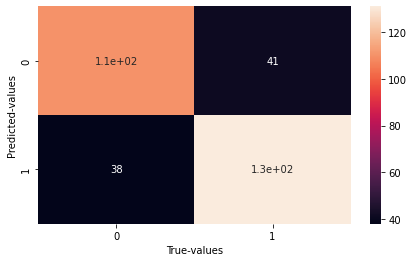

In [21]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('True-values')
plt.ylabel('Predicted-values')